<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/Copy_of_d213_task2_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
device_list = tf.test.gpu_device_name()

In [3]:
device_list

''

In [4]:
!pip install contractions
 
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.0 MB/s eta 0:00:00


In [6]:
import os
import json
import gzip
import pandas as pd
import numpy as np
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions       
from bs4 import BeautifulSoup  
import nlp_prepare as prep
import matplotlib.pyplot as plt                         
import seaborn as sns
import nltk                                             # Import Natural Language Tool-Kit.
from collections import Counter
#nltk.download('stopwords')                              # Download Stopwords.
nltk.download('all')
#nltk.download('wordnet')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
 
from sklearn import metrics
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [7]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/My Drive/Software.json.gz'


## __DATA PRE PROCESSING__

In [9]:
data = prep.extract_data_and_process(file_path)

The shape of the original dataframe is (459436, 12)
Unique products grouped by productID is 21663
Unique users grouped by reviewerID is 375147
************************************************************************
************************************************************************
Dropping columns for our analysis : reviewerName, vote, image, style
Renaming overall to rating, asin to productID, and reviewText to review
**************************************************************************
**************************************************************************
checking for nulls , and dropping if necessary....
rating             0
verified           0
reviewTime         0
reviewerID         0
productID          0
review            66
summary           56
unixReviewTime     0
dtype: int64
**************************************************************************
**************************************************************************
Checking for duplicates
Duplicate Rows

In [10]:
data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excell...,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,I am really enjoying this book with the worksh...,Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages...,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,positive


## __DATA VISUALIZATION__
 

### __Distribution of sentiments across all the reviews__

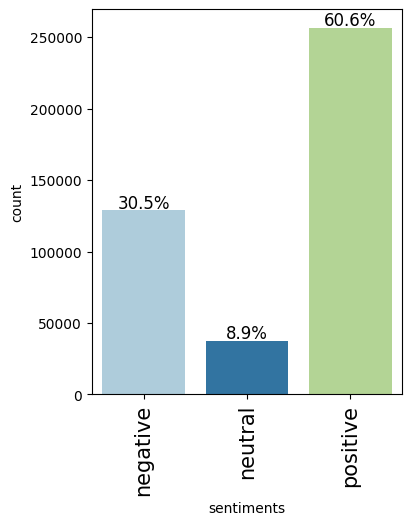

In [11]:
prep.labeled_barplot(data, "sentiments", perc=True)

### __WORDCLOUD for Negative, Positive and Neutral reviews Reviews__

In [12]:
all_sentiments =['negative', 'positive','neutral']

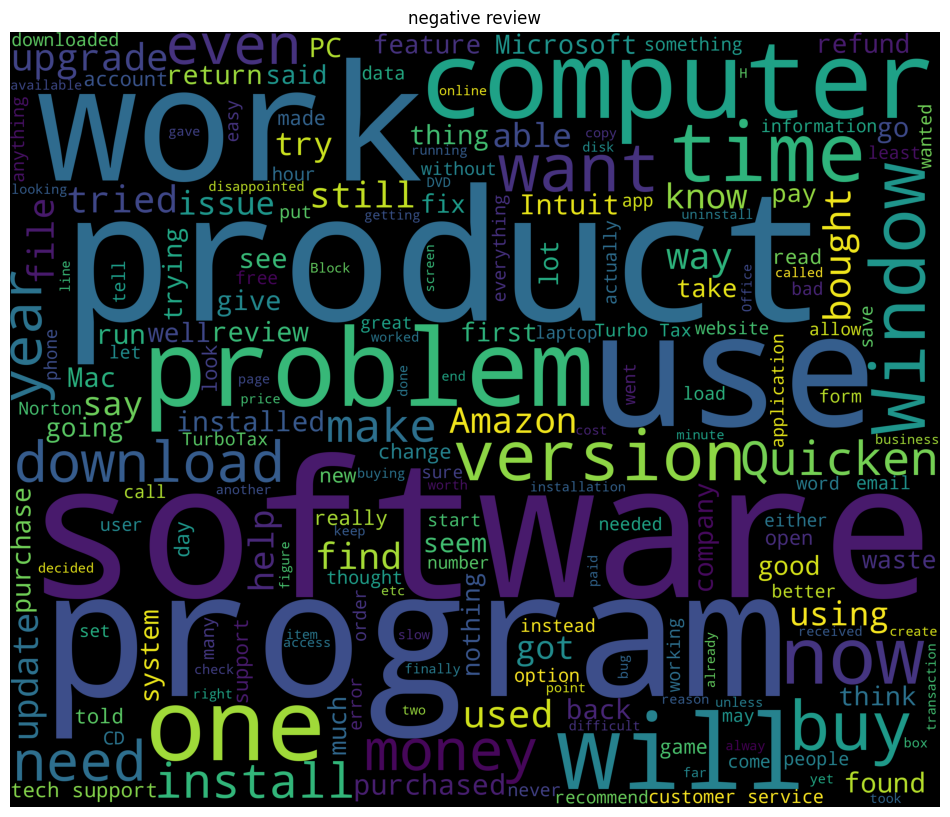

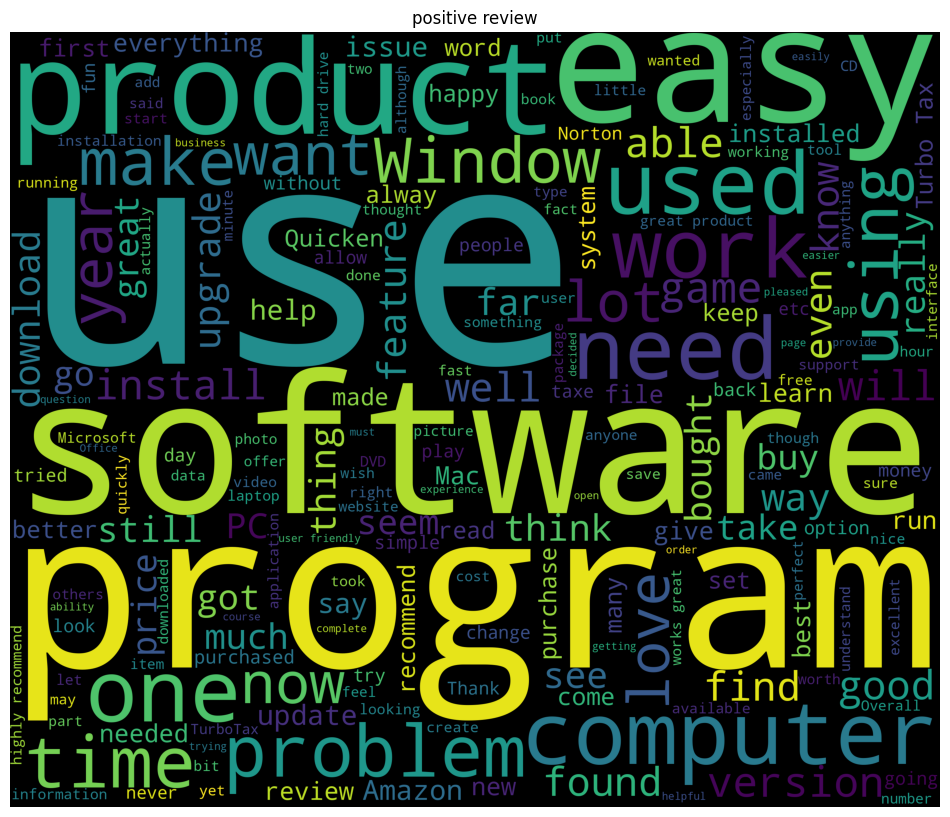

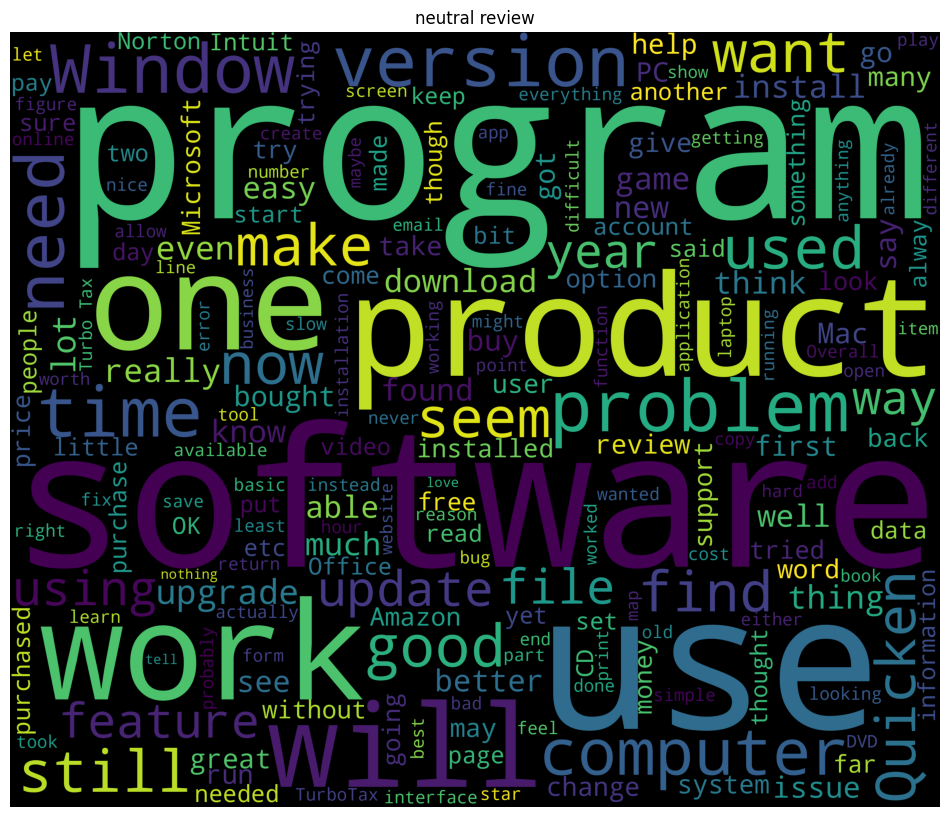

In [13]:
for x in all_sentiments:
  prep.generate_wordcloud(data, x)

In [14]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()  

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should've come with a binder and not just loose leaf.,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $140.00 FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $70.00\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I couldn't answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive


## __Data Processing:__
- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Removal of Special Characters and Punctuations.
- Conversion to lowercase.
- Remove numbers.
- Tokenization
- Remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [15]:
#remove the html tags
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, 'html')                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
 

In [16]:
#data cleaning
data['review'] = data['review'].apply(lambda x: clean_text(x)) #[nltk.word_tokenize(line) for line in x ]
data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should have come with a binder and not just loose leaf.,Material Great,1394496000,positive
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $. FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $.\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I could not answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive


In [17]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.review]
data.head()


,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,The materials arrived early and were in excellent condition. However for the money spent they really should have come with a binder and not just loose leaf.,Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.",Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $. FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $.\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!",ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,This book was missing pages!!! Important pages. I could not answer some test questions because of it!! I have never had this happen before.,missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!",Best study product out there!,1381708800,positive,107


In [18]:
data['word_count'].describe()


count    423353.000000
mean         81.358242
std         124.687189
min           0.000000
25%          20.000000
50%          42.000000
75%          97.000000
max        5132.000000
Name: word_count, dtype: float64

<Axes: xlabel='word_count'>

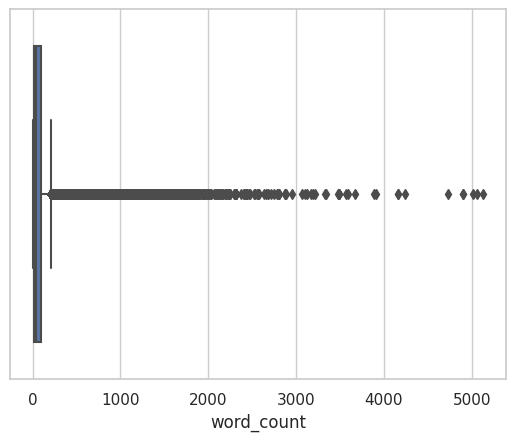

In [19]:
sns.set(style="whitegrid")
sns.boxplot(x=data['word_count'])

In [20]:
mask = (data['word_count'] < 150) & (data['word_count'] >=20)
short_reviews = data[mask]
print('No of Short reviews')
print(len(short_reviews))

mask = data['word_count'] >= 150
long_reviews = data[mask]
print('No of Long reviews')
print(len(long_reviews))

No of Short reviews
259001
No of Long reviews
61088


In [21]:
short_reviews['review'] = short_reviews.apply(lambda row: nltk.word_tokenize(row['review']), axis=1) # Tokenization of data
short_reviews.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,"[The, materials, arrived, early, and, were, in, excellent, condition, ., However, for, the, money, spent, they, really, should, have, come, with, a, binder, and, not, just, loose, leaf, .]",Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,"[I, am, really, enjoying, this, book, with, the, worksheets, that, make, you, review, your, goals, ,, what, to, do, when, you, do, not, make, it, ,, it, reminds, me, of, my, human, sexuality, classwork, .]",Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,"[IF, YOU, ARE, TAKING, THIS, CLASS, DON, '', T, WASTE, YOUR, MONEY, ON, THIS, SO, CALLED, BOOK, !, $, ., FOR, A, ``, BOOK, '', THAT, ISI, N'T, EVEN, BOUND, LOOSE, LEAFS, ,, THAT, I, HAD, TO, PROVIDE, MY, OWN, BINDER, FOR, ., TURNS, OUT, YOU, CAN, BUY, ACCESS, TO, THE, BOOK, AT, MCGRAW, HILL, CONNECT, CORE, FOR, $, ., THIS, BOOK, IS, A, COMPLETE, WASTE, OF, MONEY, !]",ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,"[This, book, was, missing, pages, !, !, !, Important, pages, ., I, could, not, answer, some, test, questions, because, of, it, !, !, I, have, never, had, this, happen, before, .]",missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,"[I, have, used, LearnSmart, and, can, officially, say, that, this, is, an, amazing, study, tool, that, quickly, and, simply, adapts, to, your, style, of, learning, ., You, can, access, it, at, anytime, and, it, is, on, the, go, !, Once, you, start, using, LearnSmart, you, will, quickly, realize, that, this, is, the, best, way, to, learn, and, study, ., I, am, a, business, student, and, I, did, not, use, LearnSmart, for, my, Accounting, I, class, ,, however, ,, I, did, use, it, for, my, Accounting, II, class, ., The, grade, difference, from, Accounting, I, to, Accounting, II, was, a, whole, ...]",Best study product out there!,1381708800,positive,107


In [22]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [23]:
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

short_reviews['review'] = short_reviews.apply(lambda row: normalize(row['review']), axis=1)
short_reviews.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,materials arrive early excellent condition however money spend really come binder not loose leaf,Material Great,1394496000,positive,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,really enjoy book worksheets make review goals not make remind human sexuality classwork,Health,1393113600,positive,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,ARE YOU KIDING ME?,1392595200,negative,58
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,book miss page important page could not answer test question never happen,missing pages!!,1392595200,neutral,24
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,Best study product out there!,1381708800,positive,107


### __Categories of sentiment to use__

The focus will be on positive and negative reviews only. The neutral reviews will be dropped

In [24]:
review_data = short_reviews.copy()

In [25]:
review_data = review_data[(review_data['sentiments']=='negative') | (review_data['sentiments']== 'positive')]

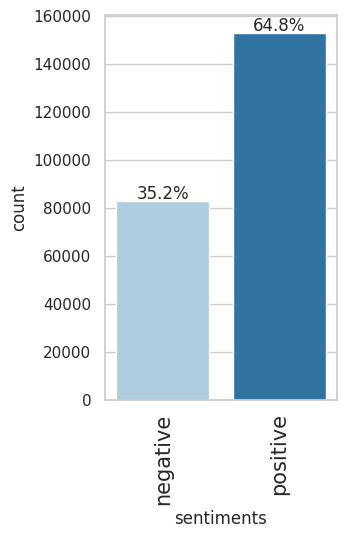

In [26]:
prep.labeled_barplot(review_data, "sentiments", perc=True)

In [27]:
review_data.sentiments = review_data.sentiments.replace(to_replace=['negative', 'positive'], value=[0, 1])



In [28]:
review_data.head()

,rating,verified,reviewTime,reviewerID,productID,review,summary,unixReviewTime,sentiments,word_count
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,materials arrive early excellent condition however money spend really come binder not loose leaf,Material Great,1394496000,1,27
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,really enjoy book worksheets make review goals not make remind human sexuality classwork,Health,1393113600,1,32
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,take class waste money call book book isi nt even bind loose leaf provide binder turn buy access book mcgraw hill connect core book complete waste money,ARE YOU KIDING ME?,1392595200,0,58
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,use learnsmart officially say amaze study tool quickly simply adapt style learn access anytime go start use learnsmart quickly realize best way learn study business student not use learnsmart account class however use account ii class grade difference account account ii whole letter grade thank learnsmart every college student definitely check,Best study product out there!,1381708800,1,107
5,4.0,True,"08 15, 2011",AGN3T5ERYJN5A,0132147556,strong backgroung good read quite date take holistic approach subject lack reference bite surprise jorge,E-marketing 6th ed,1313366400,1,24


In [29]:
#word count

In [30]:
review_data.iloc[3]

rating                                                                                                                                                                                                                                                                                                                                                                  5.0
verified                                                                                                                                                                                                                                                                                                                                                              False
reviewTime                                                                                                                                                                                                                                                                      

In [31]:
#clean
#cleaned_data = review_data.to_csv('cleaned_amazon_review_')

In [32]:
# counting unique wword for the vocabulary size

def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
  return count


counter = counter_word(review_data.review)

In [33]:
len(counter)

78419

In [34]:
counter.most_common(10)

[('not', 221537),
 ('use', 143585),
 ('work', 78392),
 ('software', 76319),
 ('get', 73545),
 ('product', 72430),
 ('program', 69316),
 ('would', 52424),
 ('version', 49369),
 ('buy', 47948)]

In [35]:
vocab_size = len(counter)

In [36]:
review_data.shape[0]

235764

### __SPLIT THE DATA INTO TRAIN AND TEST SETS__

In [37]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [38]:
train, validate, test = train_validate_test_split(review_data,target='sentiments')

In [39]:
#training set
X_train =train.review.tolist()
y_train = train.sentiments.tolist()

#validate set
X_validate =train.review.tolist()
y_validate = train.sentiments.tolist()

#test set 
X_test =train.review.tolist()
y_test = train.sentiments.tolist()

# Tokenization


In [40]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))


[[12513, 1, 30126, 30125]]


In [41]:
# Setting up the split after tokenization
train_sequences = np.array( tokenizer.texts_to_sequences(X_train) )
valid_sequences = np.array( tokenizer.texts_to_sequences(X_validate))
test_sequences  = np.array( tokenizer.texts_to_sequences(X_test) )

In [42]:
train_padded = pad_sequences(train_sequences, padding='post', maxlen=150)
valid_padded = pad_sequences(valid_sequences, padding='post', maxlen=150)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=150)

In [43]:
train_padded[70]

array([    3,     7,   228,   603,    17,     2,    45,   265,    15,
         144,  1692,    20,  1200,    13, 24136,    13,   571,   104,
         134,    89,   639,  1412,   131,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [44]:
train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_validate)
test_labels = np.asarray(y_test)

In [45]:
train_ds = tf.data.Dataset.from_tensor_slices((train_padded,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_padded,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_padded,test_labels))

In [46]:
max_features =50000
embedding_dim =16
sequence_length = 150

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [47]:
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 150, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 150, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 512)               1229312   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [48]:
epochs = 25
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/25
129/129 [==============================] - 148s 1s/step - loss: 1.1544 - binary_accuracy: 0.7540 - val_loss: 0.4293 - val_binary_accuracy: 0.8876
Epoch 2/25
129/129 [==============================] - 139s 1s/step - loss: 0.5001 - binary_accuracy: 0.8730 - val_loss: 0.3927 - val_binary_accuracy: 0.8901
Epoch 3/25
129/129 [==============================] - 140s 1s/step - loss: 0.4692 - binary_accuracy: 0.8768 - val_loss: 0.3717 - val_binary_accuracy: 0.8955
Epoch 4/25
129/129 [==============================] - 142s 1s/step - loss: 0.4565 - binary_accuracy: 0.8770 - val_loss: 0.3785 - val_binary_accuracy: 0.8889
Epoch 5/25
129/129 [==============================] - 140s 1s/step - loss: 0.4487 - binary_accuracy: 0.8764 - val_loss: 0.3504 - val_binary_accuracy: 0.8969
Epoch 6/25
129/129 [==============================] - 169s 1s/step - loss: 0.4364 - binary_accuracy: 0.8781 - val_loss: 0.3589 - val_binary_accuracy: 0.8900
Epoch 7/25
129/129 [==============================] - 142s

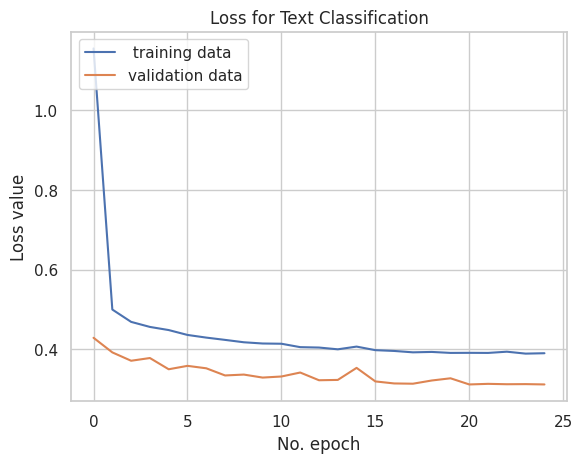

In [49]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

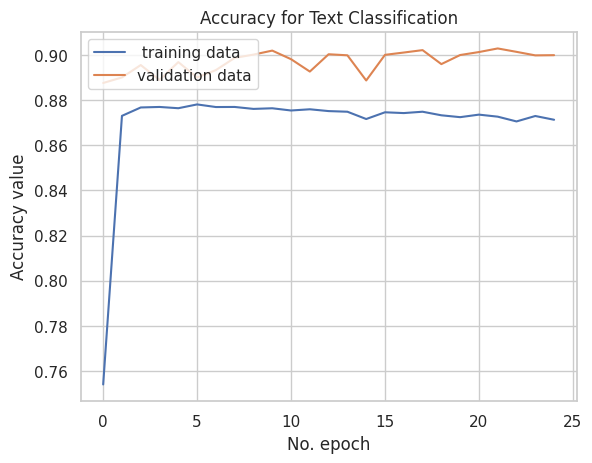

In [50]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [52]:
#Importing classback API
from keras import callbacks 

# Early stopping to prevent overfitting of our model
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

# Running model again
model2 = model.fit(train_ds.shuffle(5000).batch(1024), epochs=25, validation_data=valid_ds.batch(1024),
                    verbose=1, callbacks = [earlystopping])

Epoch 1/25
129/129 [==============================] - 141s 1s/step - loss: 0.3854 - binary_accuracy: 0.8744 - val_loss: 0.3169 - val_binary_accuracy: 0.9014
Epoch 2/25
129/129 [==============================] - 147s 1s/step - loss: 0.3881 - binary_accuracy: 0.8721 - val_loss: 0.3110 - val_binary_accuracy: 0.9003
Epoch 3/25
129/129 [==============================] - 142s 1s/step - loss: 0.3864 - binary_accuracy: 0.8718 - val_loss: 0.3156 - val_binary_accuracy: 0.8989
Epoch 4/25
129/129 [==============================] - 163s 1s/step - loss: 0.4052 - binary_accuracy: 0.8671 - val_loss: 0.3133 - val_binary_accuracy: 0.9023
Epoch 5/25
129/129 [==============================] - 153s 1s/step - loss: 0.4359 - binary_accuracy: 0.8649 - val_loss: 0.3307 - val_binary_accuracy: 0.8989
Epoch 6/25
129/129 [==============================] - 144s 1s/step - loss: 0.3931 - binary_accuracy: 0.8701 - val_loss: 0.3075 - val_binary_accuracy: 0.9025
Epoch 7/25
129/129 [==============================] - 163s

In [57]:
final_model = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= 11 ,
                    validation_data=test_ds.batch(1024),
                    verbose=1)

Epoch 1/11
129/129 [==============================] - 144s 1s/step - loss: 0.3880 - binary_accuracy: 0.8710 - val_loss: 0.3082 - val_binary_accuracy: 0.9014
Epoch 2/11
129/129 [==============================] - 139s 1s/step - loss: 0.3833 - binary_accuracy: 0.8730 - val_loss: 0.3047 - val_binary_accuracy: 0.9026
Epoch 3/11
129/129 [==============================] - 144s 1s/step - loss: 0.3871 - binary_accuracy: 0.8703 - val_loss: 0.3084 - val_binary_accuracy: 0.9028
Epoch 4/11
129/129 [==============================] - 140s 1s/step - loss: 0.3903 - binary_accuracy: 0.8689 - val_loss: 0.3189 - val_binary_accuracy: 0.9004
Epoch 5/11
129/129 [==============================] - 139s 1s/step - loss: 0.3859 - binary_accuracy: 0.8706 - val_loss: 0.3077 - val_binary_accuracy: 0.9027
Epoch 6/11
129/129 [==============================] - 162s 1s/step - loss: 0.3828 - binary_accuracy: 0.8716 - val_loss: 0.3045 - val_binary_accuracy: 0.9034
Epoch 7/11
129/129 [==============================] - 142s

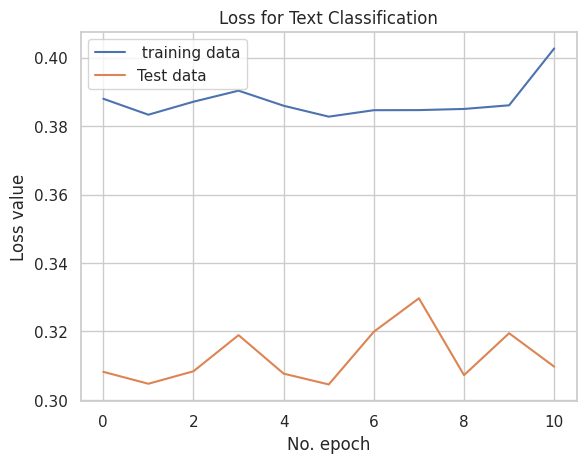

In [58]:
plt.plot(final_model.history['loss'], label=' training data')
plt.plot(final_model.history['val_loss'], label='Test data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

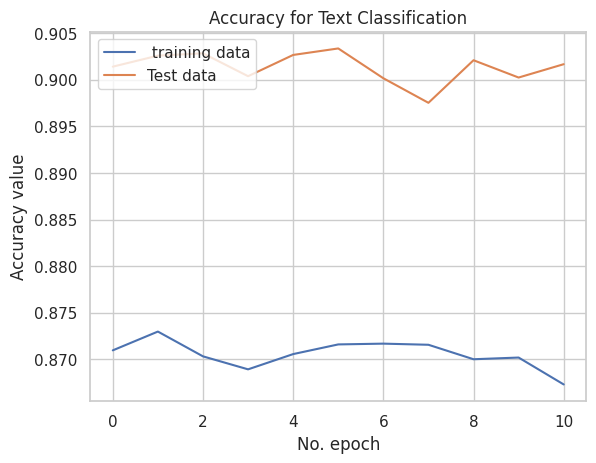

In [60]:
plt.plot(final_model.history['binary_accuracy'], label=' training data')
plt.plot(final_model.history['val_binary_accuracy'], label='Test data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
  
y_pred1=final_model.predict(test_padded)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
 

In [ ]:
#Accuracy as per the classification report 
cr = metrics.classification_report(test_labels,y_pred1)
print(cr)